In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [98]:
data = pd.read_csv("./weight-height.csv")
data.head(15)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971110
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


In [100]:
male_data = data[data["Gender"] == "Male"]
female_data = data[data["Gender"] == "Female"]

In [101]:
print("Male Data")
print(male_data.describe())
print("***********")
print("Female Data")
print(female_data.describe())

Male Data
            Height       Weight
count  5000.000000  5000.000000
mean     69.026346   187.020621
std       2.863362    19.781155
min      58.406905   112.902939
25%      67.174679   173.887767
50%      69.027709   187.033546
75%      70.988744   200.357802
max      78.998742   269.989699
***********
Female Data
            Height       Weight
count  5000.000000  5000.000000
mean     63.708774   135.860093
std       2.696284    19.022468
min      54.263133    64.700127
25%      61.894441   122.934096
50%      63.730924   136.117583
75%      65.563565   148.810926
max      73.389586   202.237214


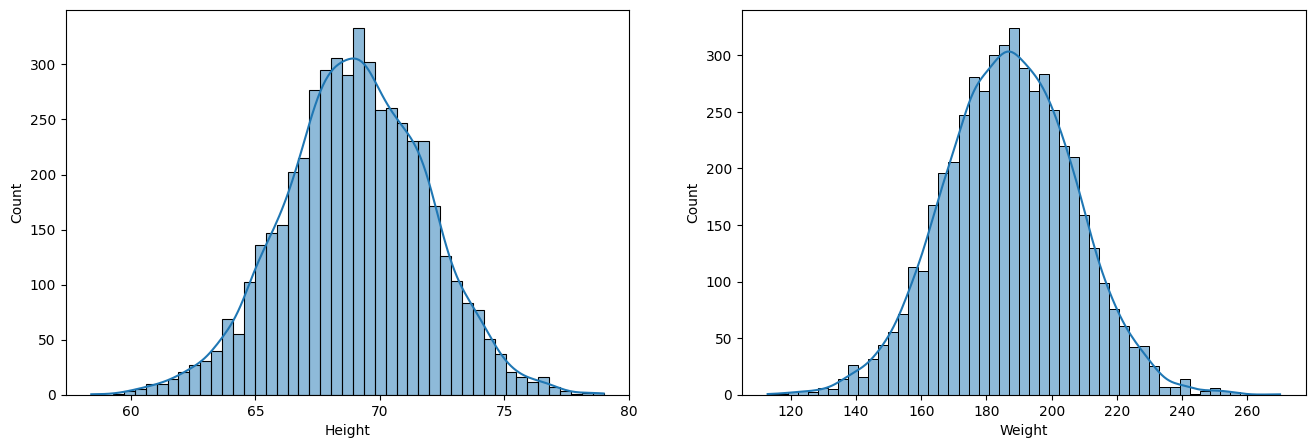

In [102]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(male_data['Height'], kde=True)

plt.subplot(1,2,2)
sns.histplot(male_data['Weight'], kde=True)

plt.show()

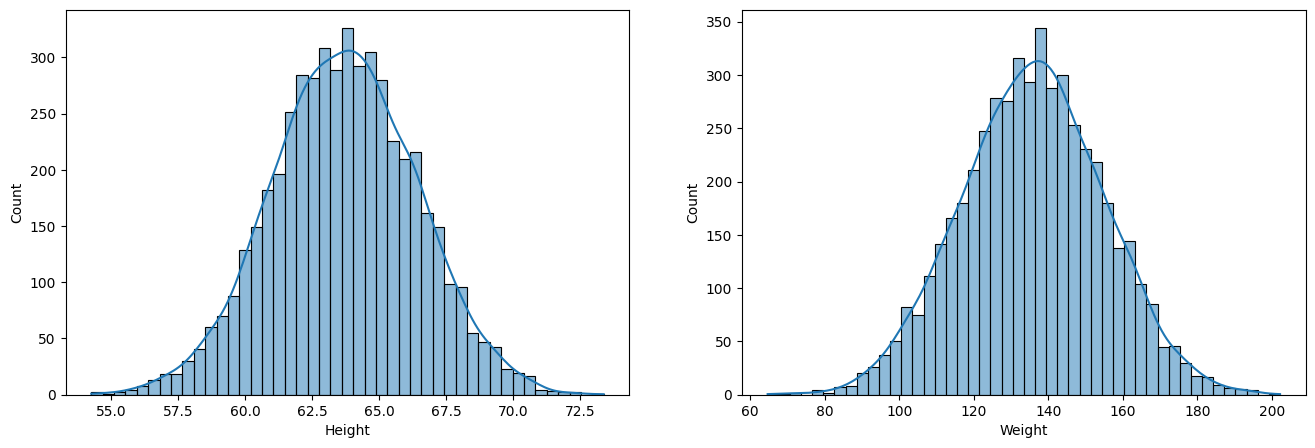

In [103]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(female_data['Height'], kde=True)

plt.subplot(1,2,2)
sns.histplot(female_data['Weight'], kde=True)

plt.show()

In [104]:
def calculateZScoreAndReplaceWithMean(data, attribute_name):
    mean = data[attribute_name].mean()
    std = data[attribute_name].std()
    data[attribute_name + '_ZScore'] = (data[attribute_name] - mean)/std
    data[(male_data[attribute_name + '_ZScore'] > 3) | (male_data[attribute_name + '_ZScore'] < -3),'attribute_name'] = mean

In [105]:
calculateZScore(male_data, "Height")
calculateZScore(male_data, "Weight")
calculateZScore(female_data, "Height")
calculateZScore(female_data, "Weight")

/tmp/ipykernel_11188/4275395613.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[attribute_name + '_ZScore'] = (data[attribute_name] - mean)/std
/tmp/ipykernel_11188/4275395613.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[attribute_name + '_ZScore'] = (data[attribute_name] - mean)/std
/tmp/ipykernel_11188/4275395613.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [106]:
male_outliers = male_data[(male_data["Height_ZScore"] > 3) | (male_data["Height_ZScore"] < -3) | (male_data["Weight_ZScore"] > 3) | (male_data["Weight_ZScore"] < -3)]
female_outliers = female_data[(female_data["Height_ZScore"] > 3) | (female_data["Height_ZScore"] < -3) | (female_data["Weight_ZScore"] > 3) | (female_data["Weight_ZScore"] < -3)]
print(len(male_outliers))
print(len(female_outliers))

30
20


In [111]:
data = pd.concat([male_data, female_data], ignore_index=True)

In [112]:
label_encoder = preprocessing.LabelEncoder() 

def convert_categorical_to_num(column):
    data[column]= label_encoder.fit_transform(data[column]) 
    return data[column]

In [122]:
X = data[['Height', 'Weight']]  # Features
y = convert_categorical_to_num("Gender")  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set - Features shape:", X_train.shape)
print("Training set - Target shape:", y_train.shape)
print("Testing set - Features shape:", X_test.shape)
print("Testing set - Target shape:", y_test.shape)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)


Training set - Features shape: (8000, 2)
Training set - Target shape: (8000,)
Testing set - Features shape: (2000, 2)
Testing set - Target shape: (2000,)
Mean Squared Error: 0.08533079725794145
R-squared: 0.6586276533503166


In [128]:
data["hwRatio"] = data["Weight"]/data["Height"]
data

X = data[['hwRatio']]  # Features
y = convert_categorical_to_num("Gender")  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set - Features shape:", X_train.shape)
print("Training set - Target shape:", y_train.shape)
print("Testing set - Features shape:", X_test.shape)
print("Testing set - Target shape:", y_test.shape)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

Training set - Features shape: (8000, 1)
Training set - Target shape: (8000,)
Testing set - Features shape: (2000, 1)
Testing set - Target shape: (2000,)
Mean Squared Error: 0.0859976511315407
R-squared: 0.6559598536927689


In [146]:
common_male_data = data[(data["Gender"] == 0) & (abs(data["Height_ZScore"])<=1) & (abs(data["Weight_ZScore"])<=1)]
common_male_data["hwRatio"].mean()

2.1320486535410454

In [145]:
common_female_data = data[(data["Gender"] == 1) & (abs(data["Height_ZScore"])<=1) & (abs(data["Weight_ZScore"])<=1)]
common_female_data["hwRatio"].mean()

2.70784040929534